# 不等流計算

## 基礎式

矩形近似した断面の不等流計算の基礎式はベルヌーイの式とマニング則より次式となる。

$$
\begin{align}
& \dfrac{d}{dx}\left( \frac{q^2}{2gh^2} + h + z_b \right) = -i_e \\
& q = \dfrac{1}{n}i_e^{1/2}h^{5/3} \\
\end{align}
$$

ここに、$q$:単位幅流量、$h$：水深、$z_b$：河床高、$i_e$：エネルギー勾配、$n$：マニングの粗度係数、$g$：重量加速度とする。

等流水深$h_0$、限界水深$h_c$は次式となる。

$$
\begin{align}
h_0&=\left(\dfrac{q^2n^2}{i_b}\right)^{3/10} \\
h_c&=\left(\dfrac{q^2}{g}\right)^{1/3}
\end{align}
$$

ここに、$i_b$：河床勾配とする。

## 離散化

ベルヌーイの式とマニング則を連立させて離散化すると次式となる。
なお、$i$:上流側、$i-1$:下流側とする。

$$
\begin{align}
\left(\frac{q^2}{2gh^2_i} + h_i + {z_b}_i \right) 
-\left( \frac{q^2}{2gh_{i-1}^2} + h_{i-1} + {z_b}_{i-1} \right) 
= \dfrac{1}{2}\left(\dfrac{q^2n^2}{h_i^{10/3}} + \dfrac{q^2n^2}{h_{i-1}^{10/3}}\right)\Delta x
\end{align}
$$

エネルギー勾配は上下流断面の平均値を用いている。

常流の場合、下流から逐次計算を行なうため未知数は$h_i$のみとなる。

## 数値計算方法

未知数$h_i$は直接計算できなため反復法によって近似解を求める。ここでは、ニュートン法を用いた。

ニュートン法のアルゴリズムに沿うと、計算式は次のとおりとなる。

$$
\begin{align}
f &= \left(\frac{q^2}{2gh^2_i} + h_i + {z_b}_i \right) 
-\left( \frac{q^2}{2gh_{i-1}^2} + h_{i-1} + {z_b}_{i-1} \right) 
 - \dfrac{1}{2}\left(\dfrac{q^2n^2}{h_i^{10/3}} + \dfrac{q^2n^2}{h_{i-1}^{10/3}}\right)\Delta x \\
\dfrac{df}{dh_i} &= -\frac{q^2}{gh^3_i} + 1 
+ \dfrac{5}{3}\dfrac{q^2n^2}{h_i^{13/3}} \Delta x
\end{align}
$$

$$
\begin{align}
h^{new}_i &= h_i - \dfrac{f}{\dfrac{df}{dh_i}}
% f &= \left(\frac{q^2}{2gh^2_i} + h_i + {z_b}_i \right) 
% -\left( \frac{q^2}{2gh_{i-1}^2} + h_{i-1} + {z_b}_{i-1} \right) 
%  + \dfrac{1}{2}\left(\dfrac{q^2n^2}{h_i^{10/3}} + \dfrac{q^2n^2}{h_{i-1}^{10/3}}\right)\Delta x \\
% \dfrac{df}{dh_i} &= -\frac{q^2}{gh^3_i} + 1 
% - \dfrac{5}{3}\dfrac{q^2n^2}{h_i^{13/3}} \Delta x
\end{align}
$$

## サンプルコード

単位幅流量0.5、マニングの粗度係数0.02、河床勾配1/500、水路延長50mの矩形水路を対象に下流端水位を限界水深としたときの水面形を計算せよ。なお、$\Delta x$は0.1とする。

In [1]:
import numpy as np

q = 0.5
n = 0.02
ib = 1/500
g = 9.8
dx = 0.1

h0 = (q**2*n**2/ib)**0.3 #等流水深
hc = (q**2/g)**(1/3) # 限界水深

L = np.arange(0,50.01,dx) #追加距離の配列
zb = L*ib #河床高の配列
h = np.zeros_like(L) #水深の配列

h[0] = hc #下流端条件
for i in range(1,len(h)):
    h[i] = h[i-1] #収束計算の初期値：一つ下流側の断面の水深
    f = 1.0 #仮値
    dfdh = 1.0 #仮値
    while np.abs(f/dfdh) > 10**(-8): # 反復計算の収束条件
        f = q**2/2.0/g/h[i]**2 + h[i] + zb[i] \
          -(q**2/2.0/g/h[i-1]**2 + h[i-1] + zb[i-1]) \
          - 0.5*(q**2*n**2/h[i]**(10/3) + q**2*n**2/h[i-1]**(10/3))*dx
        dfdh = -q**2/g/h[i]**3 + 1 + 5/3*q**2*n**2/h[i]**(13/3)*dx
        h[i] -= f/dfdh

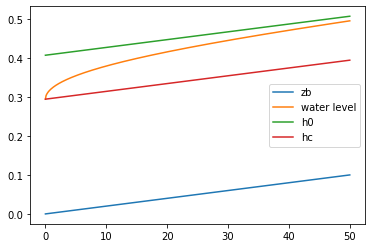

In [2]:
import matplotlib.pyplot as plt

plt.plot(L,zb, label='zb')
plt.plot(L,h+zb, label='water level')
plt.plot(L,zb+h0, label='h0')
plt.plot(L,zb+hc, label='hc')
plt.legend()              # 凡例の表示
plt.show()                # 描画

## 課題

1. 反復法をニュートン法から二分法に変更して計算して下さい。
1. 反復法をscipyパッケージに含まれるモジュールで置き換えて計算してみて下さい。
1. 完全に射流になる計算条件を設定し、S2水面形を計算してみて下さい。
